In [ ]:
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd


  from sklearn.preprocessing import StandardScaler
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import RobustScaler

In [ ]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_path = '/content/drive/My Drive/day1.csv'
day1 = pd.read_csv(my_path)
day1.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
0,1,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,10.749882,331,654,985
1,2,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,16.652113,131,670,801
2,3,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,16.636703,120,1229,1349
3,4,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,0.590435,10.739832,108,1454,1562
4,5,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,0.436957,12.522300,82,1518,1600


In [ ]:
day1 = day1.loc[:,['workingday','temp','atemp','hum', 'windspeed','tot']]
X = day1.iloc[:,0:5] 
Y = day1.tot

## Plot 1:

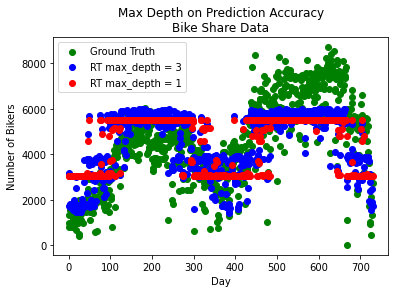

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

x = []
for i in range(len(X)):
  x.append(i)

plt.scatter(x, Y, color = 'green', label = 'Ground Truth')   # green is depth 3

clf = RandomForestRegressor(max_depth = 3)
clf = clf.fit(X, Y)
y_pred = clf.predict(X)
plt.scatter(x, y_pred, color = 'blue', label = "RT max_depth = 3") 

clf = RandomForestRegressor(max_depth = 1)
clf = clf.fit(X, Y)
y_pred = clf.predict(X)
plt.scatter(x, y_pred, color = 'red', label = "RT max_depth = 1") 

plt.xlabel('Day')
plt.ylabel('Number of Bikers')
plt.title('Max Depth on Prediction Accuracy\nBike Share Data')
plt.legend()
plt.show()

## Plot 2:

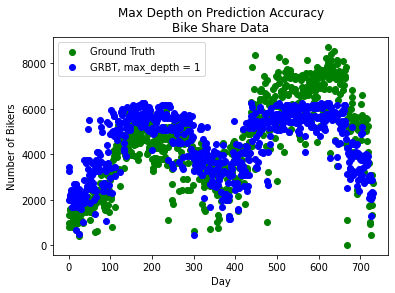

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

x = []
for i in range(len(X)):
  x.append(i)

plt.scatter(x, Y, color = 'green', label = 'Ground Truth')   # green is depth 3

clf = clf = GradientBoostingRegressor(max_depth=1).fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X)
plt.scatter(x, y_pred, color = 'blue', label = "GRBT, max_depth = 1") 

plt.xlabel('Day')
plt.ylabel('Number of Bikers')
plt.title('Max Depth on Prediction Accuracy\nBike Share Data')
plt.legend()
plt.show()

## Plot 3:

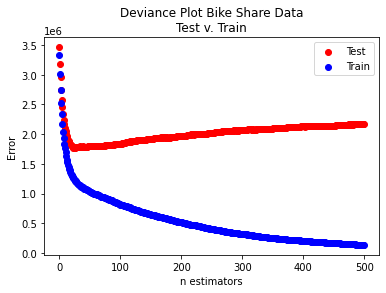

In [ ]:
# X vs Y given GBRT and staged predict 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

day1 = day1.loc[:,['workingday','temp','atemp','hum', 'windspeed','tot']]
X = day1.iloc[:,0:5] 
Y = day1.tot
X_train, X_test, y_train, y_test = train_test_split(X,Y)

n_estimators = 500

x = []
for i in range(n_estimators):
  x.append(i)

clf = GradientBoostingRegressor(n_estimators=500).fit(X_train, y_train.values.ravel())
errors1 = [mean_squared_error(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]
plt.scatter(x, errors1, color = 'red', label = "Test") 

errors2 = [mean_squared_error(y_train, y_pred) for y_pred in clf.staged_predict(X_train)]
plt.scatter(x, errors2, color = 'blue', label = "Train")

plt.xlabel('n estimators')
plt.ylabel('Error')
plt.title('Deviance Plot Bike Share Data\nTest v. Train')
plt.legend()
plt.show()

## Plot 4:

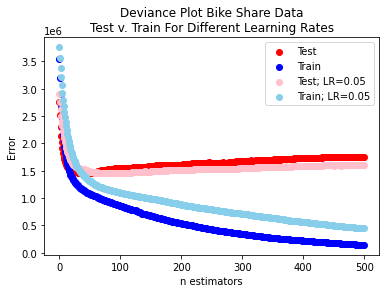

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

day1 = day1.loc[:,['workingday','temp','atemp','hum', 'windspeed','tot']]
X = day1.iloc[:,0:5] 
Y = day1.tot
X_train, X_test, y_train, y_test = train_test_split(X,Y)

n_estimators = 500

x = []
for i in range(n_estimators):
  x.append(i)

clf = GradientBoostingRegressor(n_estimators=500).fit(X_train, y_train.values.ravel())
errors1 = [mean_squared_error(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]
plt.scatter(x, errors1, color = 'red', label = "Test") 

errors2 = [mean_squared_error(y_train, y_pred) for y_pred in clf.staged_predict(X_train)]
plt.scatter(x, errors2, color = 'blue', label = "Train")

clf = GradientBoostingRegressor(n_estimators=500, learning_rate = 0.05).fit(X_train, y_train.values.ravel())
errors3 = [mean_squared_error(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]
plt.scatter(x, errors3, color = 'pink', label = "Test; LR=0.05") 

errors4 = [mean_squared_error(y_train, y_pred) for y_pred in clf.staged_predict(X_train)]
plt.scatter(x, errors4, color = 'skyblue', label = "Train; LR=0.05")

plt.xlabel('n estimators')
plt.ylabel('Error')
plt.title('Deviance Plot Bike Share Data\nTest v. Train For Different Learning Rates')
plt.legend()
plt.show()

## Plot 5:

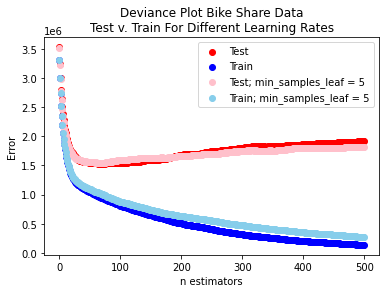

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

day1 = day1.loc[:,['workingday','temp','atemp','hum', 'windspeed','tot']]
X = day1.iloc[:,0:5] 
Y = day1.tot
X_train, X_test, y_train, y_test = train_test_split(X,Y)

n_estimators = 500

x = []
for i in range(n_estimators):
  x.append(i)

clf = GradientBoostingRegressor(n_estimators=500).fit(X_train, y_train.values.ravel())
errors1 = [mean_squared_error(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]
plt.scatter(x, errors1, color = 'red', label = "Test") 

errors2 = [mean_squared_error(y_train, y_pred) for y_pred in clf.staged_predict(X_train)]
plt.scatter(x, errors2, color = 'blue', label = "Train")

clf = GradientBoostingRegressor(n_estimators=500, min_samples_leaf = 5).fit(X_train, y_train.values.ravel())
errors3 = [mean_squared_error(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]
plt.scatter(x, errors3, color = 'pink', label = "Test; min_samples_leaf = 5") 

errors4 = [mean_squared_error(y_train, y_pred) for y_pred in clf.staged_predict(X_train)]
plt.scatter(x, errors4, color = 'skyblue', label = "Train; min_samples_leaf = 5")

plt.xlabel('n estimators')
plt.ylabel('Error')
plt.title('Deviance Plot Bike Share Data\nTest v. Train For Different Learning Rates')
plt.legend()
plt.show()